In [4]:
from datasets import load_from_disk

dataset = load_from_disk("/home/allanz/data/datasets/spuco/test/multimodal_dataset")

In [5]:
dataset["train"][0]["image"]

'/home/allanz/data/grid/spuco/train/0.png'

{'text': "| dog | dog | dog |\n| cat | bird | cat |\n| bird | automobile | cat |\nThe grid above is size 3 by 3. Each cell contains an object from ['dog', 'bird', 'cat', 'automobile'].\nWhat object is in row 2, column 0? A: bird\nWhat object is in row 2, column 1? A: automobile\nWhat object is in row 1, column 2? A: cat\nWhat object is in row 2, column 2? A: cat\nWhat object is in row 1, column 0? A: cat\nWhat object is in row 0, column 1? A: dog\nWhat object is in row 0, column 0? A: dog\nWhat object is in row 0, column 2? A: dog\nWhat object is in row 1, column 1? A: bird", 'prompt': "The grid above is size 3 by 3. Each cell contains an object from ['dog', 'bird', 'cat', 'automobile'].", 'conversations': [['What object is in row 2, column 0? ', 'bird'], ['What object is in row 2, column 1? ', 'automobile'], ['What object is in row 1, column 2? ', 'cat'], ['What object is in row 2, column 2? ', 'cat'], ['What object is in row 1, column 0? ', 'cat'], ['What object is in row 0, column 1

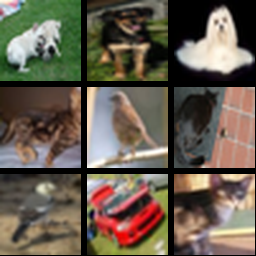

In [6]:
import random
from PIL import Image
i = random.randint(0, len(dataset["train"]))
print(dataset["train"][i])
Image.open(dataset["train"][i]["image"])
